In [1]:
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [2]:
data = load_breast_cancer()
x, y = data["data"], data["target"]
data["target_names"]
# Dividindo os dados em treino e teste, normalmente em 20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [3]:
clf = LinearSVC()   # inicializa o modelo 
clf.fit(x_train, y_train)# Treina o modelo 

LinearSVC()

In [4]:
clf.score(x_test, y_test) #precisao do modelo

0.9473684210526315

In [5]:
clf.predict([x_test[0]])

array([0])

In [6]:
# cria o explicador SHAP usando o KernelExplainer com uma amostra dos dados
explainer = shap.KernelExplainer(clf.predict,shap.kmeans(x_train,10))

In [7]:
shap_values = explainer(x_test) # mudei o codigo do video, pois este é mais eficiente e consistente, pois retorna um objeto Explanation

  0%|          | 0/114 [00:00<?, ?it/s]

In [9]:
#aqui eu tambem mudei a forma pois o metodo explainer(x_test) retorna um objeto Explanation nas versões mais recentes do SHAP, e o force_plot espera esse formato diretamente, não um array de valores SHAP como anteriormente

# Calcula os valores SHAP corretamente
shap_values = explainer(x_test)

# Exibe o gráfico de força corretamente
shap.initjs()
shap.force_plot(shap_values[5].base_values, shap_values[5].values, x_test[5], feature_names=data["feature_names"])


  0%|          | 0/114 [00:00<?, ?it/s]

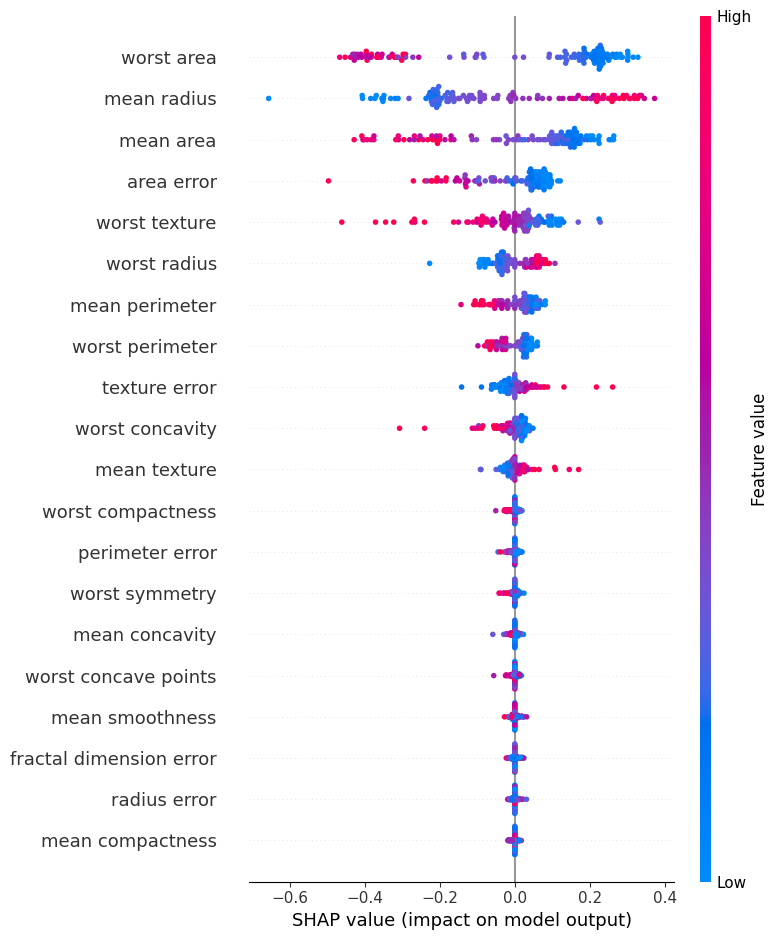

In [10]:
#visualizacao que ajuda a entender o impacto de cada feature no modelo, mostrando a importancia de cada uma das variaveis para a previsao final
shap.summary_plot(shap_values,x_test, feature_names = data["feature_names"])

In [12]:
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0) #media do valor absoluto para cada feature

In [13]:
feature_names = data["feature_names"] #nome das features
feature_importance = zip(feature_names, mean_abs_shap_values) #combaincao do nome com sua iomportancia de media

In [14]:
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse = True) #ordena na mai alta para a mais baixa

In [15]:
for feature, importance in sorted_feature_importance:
    print(feature, ":", importance)

worst area : 0.25187366332436567
mean radius : 0.20179651474703253
mean area : 0.16757507855803516
area error : 0.08517732964145504
worst texture : 0.07755964216861233
worst radius : 0.04842290159005314
mean perimeter : 0.04472107513677309
worst perimeter : 0.03563292663669362
texture error : 0.031707670322351535
worst concavity : 0.02809096585822903
mean texture : 0.021231693702425097
worst compactness : 0.007426256853142434
perimeter error : 0.007177181556627835
worst symmetry : 0.006319242090768674
mean concavity : 0.006096850606999406
worst concave points : 0.0059283527794842025
mean smoothness : 0.005786118006142444
fractal dimension error : 0.005220686840000288
radius error : 0.004714424873374524
mean compactness : 0.00444865869571437
mean fractal dimension : 0.004380514714563137
concavity error : 0.004300495545094221
mean concave points : 0.0042921325841860465
mean symmetry : 0.004291277557613108
worst smoothness : 0.004191202591484419
smoothness error : 0.0041717709528455585
co